<a href="https://colab.research.google.com/github/BLarisa/11111/blob/main/labrabota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd # загружаем библиотеку и для простоты обращения в коде называем её сокращенно pd

In [4]:
import matplotlib.pyplot as plt # загружаем библиотеку и для простоты обращения в коде называем её сокращенно plt
# указываем, чтобы картинки отображались прямо в ноутбуке 
%matplotlib inline 

In [5]:
%%capture
!wget https://www.dropbox.com/s/afwb0tnqm9izxha/predict_house_price_training_data.xlsx
!wget https://www.dropbox.com/s/sur2avqf4n5f4az/predict_house_price_test_data.xlsx

In [6]:
training_data = pd.read_excel('predict_house_price_training_data.xlsx') # загружаем таблицу в переменную training_data

In [7]:
training_data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,830000,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,385000,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,610000,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,550000,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,1300000,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407


In [8]:
training_data.shape

(15129, 16)

In [9]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15129 entries, 0 to 15128
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         15129 non-null  int64  
 1   Спальни              15129 non-null  int64  
 2   Ванные               15129 non-null  float64
 3   Жилая площадь        15129 non-null  int64  
 4   Общая площадь        15129 non-null  int64  
 5   Количество этажей    15129 non-null  float64
 6   Вид на воду          15129 non-null  int64  
 7   Просмотрены ранее    15129 non-null  int64  
 8   Состояние            15129 non-null  int64  
 9   Оценка риелтора      15129 non-null  int64  
 10  Площадь без подвала  15129 non-null  int64  
 11  Площадь подвала      15129 non-null  int64  
 12  Год постройки        15129 non-null  int64  
 13  Год реновации        15129 non-null  int64  
 14  Широта               15129 non-null  float64
 15  Долгота              15129 non-null 

In [10]:
target_variable_name = 'Целевая.Цена'

In [11]:
training_values = training_data[target_variable_name]

In [13]:
training_points = training_data.drop(target_variable_name, axis=1)

In [14]:
training_points.head()

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407


In [15]:
training_points.shape

(15129, 15)

In [16]:
from sklearn import linear_model, ensemble

In [17]:
linear_regression_model = linear_model.LinearRegression() # создаем модель

In [18]:
linear_regression_model # смотрим, что получилось

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
random_forest_model = ensemble.RandomForestRegressor()
random_forest_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [20]:
linear_regression_model.fit(training_points, training_values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
random_forest_model.fit(training_points, training_values)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [22]:
test_data = pd.read_excel('predict_house_price_test_data.xlsx')

In [23]:
test_data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,260000,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,734500,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,325000,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,1990000,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,315000,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


In [24]:
test_data.shape

(6484, 16)

In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         6484 non-null   int64  
 1   Спальни              6484 non-null   int64  
 2   Ванные               6484 non-null   float64
 3   Жилая площадь        6484 non-null   int64  
 4   Общая площадь        6484 non-null   int64  
 5   Количество этажей    6484 non-null   float64
 6   Вид на воду          6484 non-null   int64  
 7   Просмотрены ранее    6484 non-null   int64  
 8   Состояние            6484 non-null   int64  
 9   Оценка риелтора      6484 non-null   int64  
 10  Площадь без подвала  6484 non-null   int64  
 11  Площадь подвала      6484 non-null   int64  
 12  Год постройки        6484 non-null   int64  
 13  Год реновации        6484 non-null   int64  
 14  Широта               6484 non-null   float64
 15  Долгота              6484 non-null   f

In [26]:
test_values = test_data[target_variable_name]

In [27]:
test_points = test_data.drop(target_variable_name, axis=1)

In [28]:
test_points.head()

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


In [29]:
test_points.shape

(6484, 15)

In [30]:
test_predictions_linear = linear_regression_model.predict(test_points)

In [31]:
test_predictions_random_forest = random_forest_model.predict(test_points)

In [32]:
%matplotlib inline 

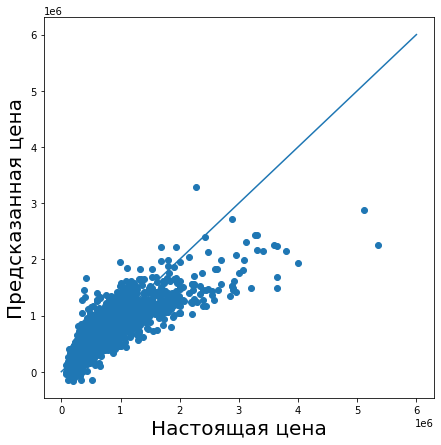

In [33]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 6 * 10**6], [0, 6 * 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

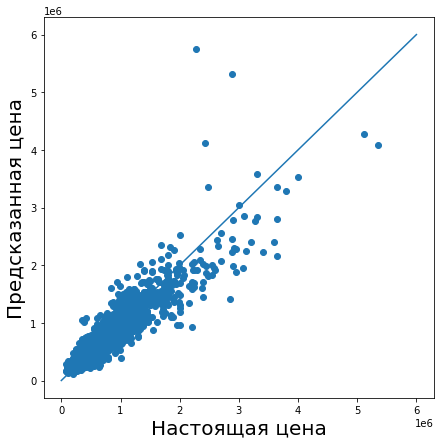

In [34]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_random_forest)
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear) 
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)

In [37]:
mean_absolute_error_random_forest_model = mean_absolute_error(test_values, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(test_values, test_predictions_random_forest)

In [38]:
import numpy as np

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии".format(
        mean_absolute_error_linear_model, 
        np.sqrt(mean_squared_error_linear_model)))

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели случайного леса".format(
       mean_absolute_error_random_forest_model, 
       mean_squared_error_random_forest_model**(1/2)))

MAE: 126852.51, RMSE: 201883.24 для модели линейной регрессии
MAE: 70735.80, RMSE: 136391.40 для модели случайного леса


In [39]:
training_points.head(10)

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407
5,3,2.25,2300,9914,2.0,0,0,4,8,2300,0,1980,0,47.5677,-122.086
6,3,2.50,2770,8820,1.0,0,0,3,7,1900,870,1980,2004,47.3685,-122.048
7,2,1.75,1650,7500,1.0,0,0,4,7,1000,650,1959,0,47.6871,-122.207
8,1,1.00,580,1799,1.0,0,0,3,7,580,0,1908,2005,47.6829,-122.375
9,2,1.00,900,3400,1.0,0,0,5,6,900,0,1905,0,47.5269,-122.314


In [40]:
training_points['Год реновации'].value_counts()

0       14490
2014       63
2013       31
2000       28
2003       24
        ...  
1959        1
1948        1
1954        1
1962        1
1955        1
Name: Год реновации, Length: 67, dtype: int64

In [41]:
# на всякий случай переобучим модель, так как оценить значимость признаков можно только у уже обученной модели
random_forest_model.fit(training_points, training_values)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
random_forest_model.feature_importances_

array([0.00398267, 0.0103002 , 0.31108858, 0.02591803, 0.00270601,
       0.02862862, 0.01525211, 0.00397848, 0.28277198, 0.02744048,
       0.00778958, 0.03187709, 0.00255047, 0.1729982 , 0.07271752])

In [43]:
training_points.keys()

Index(['Спальни', 'Ванные', 'Жилая площадь', 'Общая площадь',
       'Количество этажей', 'Вид на воду', 'Просмотрены ранее', 'Состояние',
       'Оценка риелтора', 'Площадь без подвала', 'Площадь подвала',
       'Год постройки', 'Год реновации', 'Широта', 'Долгота'],
      dtype='object')

In [44]:
feature_importance = pd.DataFrame(columns = ['Название признака', 'Важность признака'])

In [45]:
feature_importance['Название признака'] = training_points.keys()
feature_importance['Важность признака'] = random_forest_model.feature_importances_

In [46]:
# выведем полученную таблицу
feature_importance

,Название признака,Важность признака
0,Спальни,0.003983
1,Ванные,0.010300
2,Жилая площадь,0.311089
3,Общая площадь,0.025918
4,Количество этажей,0.002706
5,Вид на воду,0.028629
6,Просмотрены ранее,0.015252
7,Состояние,0.003978
8,Оценка риелтора,0.282772
9,Площадь без подвала,0.027440


In [47]:
feature_importance.sort_values(by='Важность признака', ascending=False)

,Название признака,Важность признака
2,Жилая площадь,0.311089
8,Оценка риелтора,0.282772
13,Широта,0.172998
14,Долгота,0.072718
11,Год постройки,0.031877
5,Вид на воду,0.028629
9,Площадь без подвала,0.027440
3,Общая площадь,0.025918
6,Просмотрены ранее,0.015252
1,Ванные,0.010300
